# (1) Clustering Algorithms Implementation :

## (a) Introducing k-Means Clustering
The k-means methodology delves into the exploration of distinct clusters within a dataset devoid of labels, employing a predetermined count of clusters and a multidimensional perspective. It hinges upon a fundamental concept of ideal clustering:

The nucleus of each cluster forms from the average position of all its affiliated points.
Each individual point gravitates towards its own cluster nucleus, closer than to any other.

These foundational principles underpin the k-means framework. Further exploration will elucidate the pathway to this solution. However, let's first examine a basic dataset to witness the outcome of the k-means approach.

Initially, we shall construct a two-dimensional dataset comprising four discernible clusters. To underscore the unsupervised nature of the algorithm, labels will remain absent from the visualization:

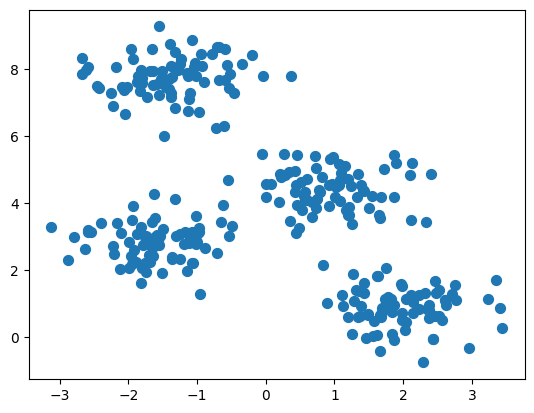

In [38]:
# Importing necessary modules to begin
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

With human perception, identifying the four clusters seems relatively straightforward. However, the k-means algorithm performs this task automatically, utilizing the conventional estimator API within Scikit-Learn:

To depict the outcomes, let's generate a visualization where the data is color-coded based on these identified labels (refer to the forthcoming figure). Additionally, we'll mark the cluster centers determined by the k-means estimator:

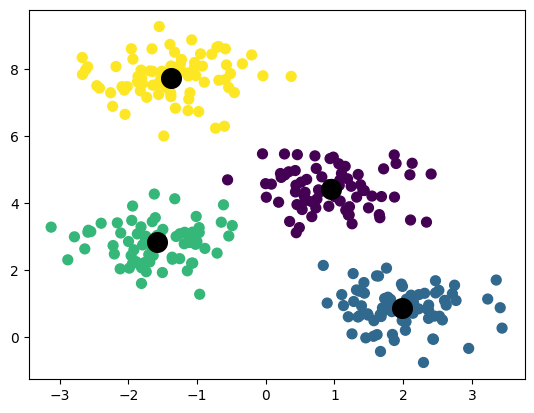

In [39]:
# Using KMeans to cluster data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

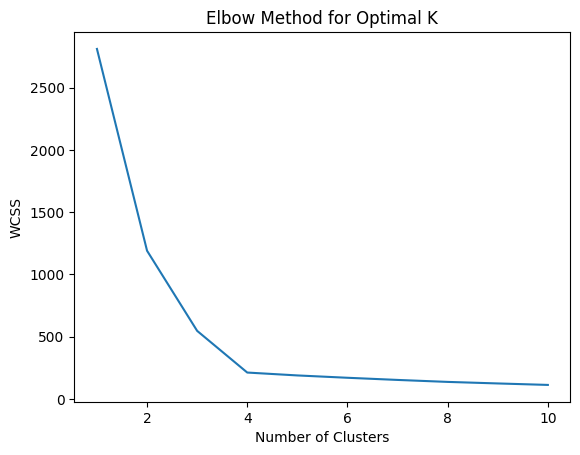

In [40]:
# Evaluation for Optimal K to be used for the dataset by Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## (b) Introducing Hierarchical Clustering
The approach of hierarchical clustering stands distinct from methods like K Means or K Mode due to variations in the underlying algorithms governing the clustering process. 

While K Means leverages centroid and Euclidean distance amalgamation to structure clusters, hierarchical clustering employs either agglomerative or divisive techniques. 

Unlike K Means, which requires pre-specification of cluster count, hierarchical clustering enables the visualization of clusters through dendrograms, facilitating a more insightful interpretation of results via meaningful taxonomies. 

The creation of a dendrogram alleviates the necessity of upfront cluster count specification.

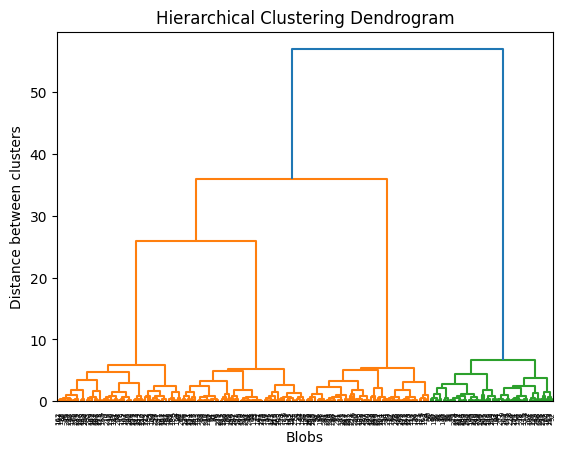

In [41]:
#Importing necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Applying Hierarchical Clustering to plot a Dendogram
linked = linkage(X, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Blobs')
plt.ylabel('Distance between clusters')
plt.show()

### Pros and Cons:

***Benefits***

1) Incorporates a Hierarchical Representation

2) Eliminates the Requirement for Predefining Cluster Count

3) Proficient in Capturing Intricate Structures

4) Offers Flexibility in Linkage Approaches

***Drawbacks***

1) Absence of Singular Solutions

2) Vulnerability to Outliers

3) Challenges in Managing Extensive Datasets

 ## (c) Introducing DBSCAN
The DBSCAN algorithm interprets clusters as regions of elevated density separated by regions of lower density. This broad perspective allows DBSCAN to identify clusters of various shapes, unlike k-means, which assumes clusters to be convex.

At the heart of DBSCAN lies the concept of core samples—samples located within areas of high density. Consequently, a cluster comprises core samples, each closely situated to one another (as measured by a distance metric), along with non-core samples in proximity to a core sample but not categorized as core samples themselves. 

The algorithm relies on two parameters, min_samples and eps, to formally define density. A higher min_samples or lower eps value indicates a higher density required for cluster formation.

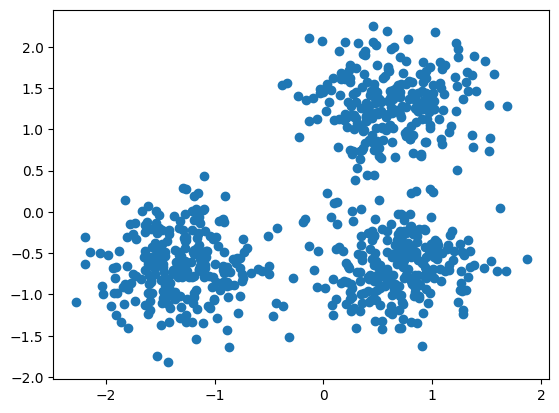

In [42]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [43]:
from sklearn import metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


In [44]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print("Adjusted Mutual Information:"f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


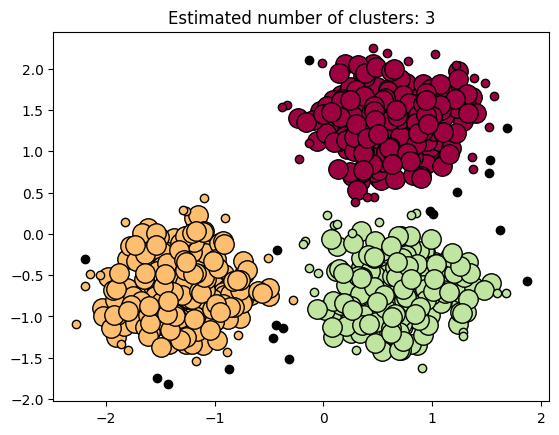

In [45]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

### Performance Comparison with k-means clustering:

**Advantages**

1) DBSCAN excels in detecting clusters of irregular shapes, providing flexibility beyond the constraints of spherical clusters. Its capability to accommodate clusters of diverse shapes and densities is noteworthy.

2) DBSCAN demonstrates effectiveness in scenarios characterized by clusters of disparate sizes and densities.

3) Robust against noise, DBSCAN adeptly recognizes and labels outliers, making it a favorable choice for datasets featuring noisy or sparse regions.

**Limitations**

1) Datasets with clusters exhibiting substantial variations in densities may pose challenges for DBSCAN.

2) DBSCAN's performance hinges significantly on parameter selection, particularly the choice of distance parameter (ϵ) and minimum number of points (MinPts).

# (2) Dimensionality Reduction Techniques:

## (a) Principal Component Analysis (PCA):

PCA, or Principal Component Analysis, serves the purpose of diminishing the dimensionality inherent in datasets possessing a high number of dimensions.

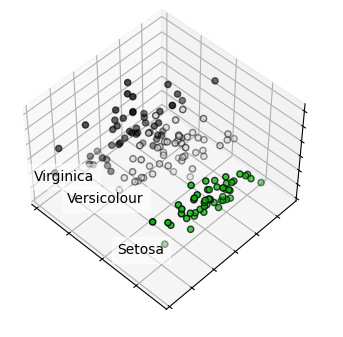

In [46]:
import mpl_toolkits.mplot3d 
# Required for doing 3d projections with matplotlib
from sklearn import datasets, decomposition
np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y = iris.target
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reordering the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
plt.show()

### Data Visualization:
**Reduced Complexity:**
Navigating high-dimensional datasets presents a challenge in visualization. Techniques like Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE) alleviate this complexity by projecting data onto lower-dimensional spaces, facilitating easier visualization.

**Preservation of Patterns:**
Dimensionality reduction endeavors to maintain crucial patterns and structures within data while discarding extraneous details. By visualizing data in a reduced-dimensional space, inherent relationships and clusters become more apparent.

**Enhanced Interpretability:**
Lower-dimensional representations often yield more interpretable visualizations. Features are condensed into a smaller set of components that may correspond to meaningful aspects of the data, thereby aiding in comprehension and decision-making.

### Data Modeling:
**Mitigation of Curse of Dimensionality:**
The challenges posed by high-dimensional spaces, such as increased sparsity and computational demands, are addressed through dimensionality reduction. By reducing the feature set, these issues are mitigated, resulting in improved model performance.

**Computational Efficiency:**
Complexities arise in many machine learning algorithms when handling high-dimensional datasets. Dimensionality reduction techniques enhance computational efficiency by streamlining training and inference processes.

**Variance Ratio Plot (PCA):**
When utilizing Principal Component Analysis (PCA) to reduce dimensionality, a pivotal aspect lies in comprehending the explained variance ratio plot. Let's delve into its interpretation:

**Explained Variance Ratio:**
The explained variance ratio elucidates the proportion of total dataset variance captured by each principal component. It is computed by dividing the eigenvalue (variance) of each principal component by the total eigenvalues.

**Interpretation:**
The plot aids in determining the optimal number of principal components to retain based on desired variance explanation. An inflection point indicates diminishing returns, guiding the selection of an appropriate component count.

**Plotting Explained Variance:**
Typically, the plot illustrates cumulative explained variance ratio against the number of principal components. Each point represents the cumulative percentage of variance explained by considering up to that specific number of components.

**Elbow Point:**
Identifying an "elbow" point signifies where the increase in explained variance plateaus. This juncture often denotes a balance between dimensionality reduction and information retention.

**Setting a Threshold:**
Alternatively, a predefined variance threshold guides the selection of principal components necessary to achieve the desired variance retention level.

**Improved Generalization:**
Dimensionality reduction mitigates overfitting concerns, particularly in datasets with features comparable to or surpassing the number of samples. By focusing on informative features, models generalize better to unseen data.

**Impact on Dimensionality Reduction:**
The plot informs how much dimensionality can be reduced while retaining a specific percentage of the original data's variance, facilitating quicker computations and simpler models.

## (b) t-SNE (t-Distributed Stochastic Neighbor Embedding):
t-SNE, short for t-Distributed Stochastic Neighbor Embedding, serves as a dimensionality reduction method frequently employed to visualize high-dimensional data in lower-dimensional spaces, often two or three dimensions. Diverging from conventional methods like PCA (Principal Component Analysis), t-SNE prioritizes the preservation of pairwise similarities among data points in the high-dimensional realm, rendering it especially adept at unveiling intricate structures and relationships inherent in the dataset.

In [47]:
import matplotlib.pyplot as plt
# Importing datasets
from sklearn import datasets
digits = datasets.load_digits()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
digits.target

array([0, 1, 2, ..., 8, 9, 8])

Using PCA (Principal Component Analysis) we get the following :

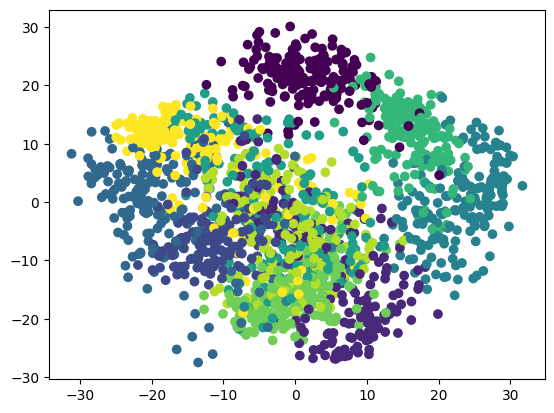

In [48]:
X = digits.data
y = digits.target

# Using PCA
X_pca = PCA(n_components=2).fit_transform(X)
pca_x = X_pca[:,0]
pca_y = X_pca[:,1]

# Plotting graph
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(pca_x, pca_y, c=y)

While , using t-SNE (t-Distributed Stochastic Neighbor Embedding) we get the following :

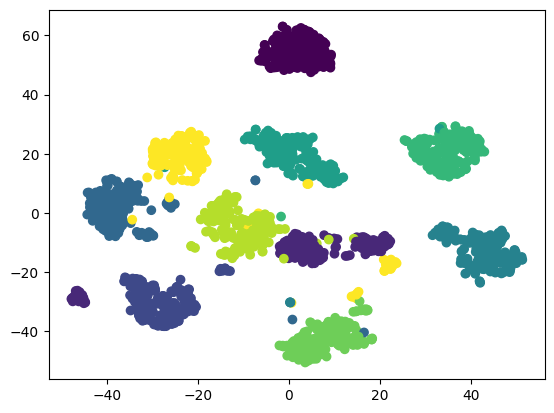

In [49]:
X_tsne = TSNE(n_components=2).fit_transform(X)
tsne_x = X_tsne[:,0]
tsne_y = X_tsne[:,1]

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(tsne_x, tsne_y, c=y)

# Advanced Clustering Techniques:
(1) **Spectral Clustering:** 

*Overview:*

Spectral Clustering leverages eigenvalues from a similarity matrix to conduct dimensionality reduction before applying clustering algorithms like K-means. Advantages: Effectively captures clusters exhibiting non-convex shapes. Compatible with both symmetric and asymmetric affinity matrices. Applications: Finds utility in various domains including image segmentation, document clustering, and community detection.

(2) **OPTICS (Ordering Points to Identify the Clustering Structure):**

*Overview:*

OPTICS extends DBSCAN, offering a density-based clustering solution. It constructs a reachability plot to identify clusters characterized by differing densities. Advantages: Robust against noise and proficient in identifying clusters of diverse shapes and sizes. Provides a hierarchical clustering framework. Applications: Applied extensively in spatial data analysis, anomaly detection, and density-based clustering.

(3) **Mean Shift Clustering:** 

*Overview:* 

Mean Shift presents a density-based clustering approach, aiming to uncover modes or peaks within the data distribution. Advantages: Eliminates the need to predefine the cluster count. Particularly suitable for datasets featuring irregular shapes and varying densities. Applications: Widely employed in image segmentation, object tracking, and feature space analysis.

# Comparison of Dimensionality Reduction Techniques :

## Strengths, Weaknesses, and Applications:
### 1. Principal Component Analysis (PCA):

**Strengths:**

* *Linear Dimensionality Reduction:*
Effectively handles linearly correlated features, capturing significant data variance.

* *Preservation of Global Structure:*
Maintains the global data structure during reduction.

* *Computational Efficiency:*
Suitable for large datasets due to its computational efficiency.

**Weaknesses:**

* *Orthogonal Transformation:*
Interpretation of orthogonal components can be challenging.

* *Assumption of Linearity:*
May struggle with nonlinear structures as it assumes linear feature relationships.

* *Sensitivity to Scaling:*
Performance impacted by variations in feature scaling.

**Applications:**

Image compression, noise reduction, and feature extraction in machine learning models.

### 2. t-Distributed Stochastic Neighbor Embedding (t-SNE):

**Strengths:**

* *Nonlinear Dimensionality Reduction:*
Efficiently captures nonlinear relationships within the data.

* *Visualization Utility:*
Widely employed for visualizing high-dimensional data in lower dimensions.

* *Preservation of Local Structures:*
Retains local structures, facilitating cluster and pattern visualization.

**Weaknesses:**

* *Perplexity Sensitivity:*
Sensitive to perplexity parameter selection.

* *Non-Deterministic Behavior:*
Results may differ across runs due to its non-deterministic nature.

* *Computational Complexity:*
Can be computationally demanding, especially with large datasets.

**Applications:**

Visualization of high-dimensional data, exploratory data analysis, and pattern recognition.

# Unsupervised machine learning applications :

Unsupervised learning constitutes a subset of machine learning where algorithms are presented with data devoid of explicit instructions on handling it. The system autonomously endeavors to discern underlying patterns and structures within the data. Below are diverse applications of unsupervised learning:

**1. Clustering:**

* **Customer Segmentation:** Categorizing customers based on purchasing behavior, demographics, or other pertinent features to tailor marketing strategies.
* **Document Clustering:** Grouping extensive sets of documents into clusters to facilitate information retrieval and organization.

**2. Generative Models:**

* **Data Synthesis:** Creating synthetic data resembling real data to bolster training sets, particularly beneficial when real data is scarce.
* **Image and Text Generation:** Crafting new images or producing coherent text based on learned patterns from training data.

**3. Dimensionality Reduction:**

* **Feature Extraction:** Streamlining dataset features while retaining essential information, enhancing model efficiency and performance.
* **Image Compression:** Shrinking image sizes while conserving vital visual details.

**4. Reinforcement Learning (when coupled with unsupervised learning):**

* **State Representation Learning:** Acquiring useful state representations in a reinforcement learning environment without explicit labeling.

**5. Anomaly Detection:**

* **Fraud Detection:** Spotting unusual patterns or behaviors in financial transactions indicative of fraudulent activities.
* **Network Intrusion Detection:** Identifying irregular patterns in network traffic signaling potential security breaches.

**6. Density Estimation:**

* **Outlier Detection:** Pinpointing instances in a dataset significantly deviating from the norm, applicable across domains like finance or healthcare.

**7. Association Rule Learning:**

* **Market Basket Analysis:** Unearthing patterns in customer purchasing behavior to reveal product associations, aiding in product placement and recommendations.
* **Healthcare Diagnosis:** Revealing associations between symptoms and diseases to enhance diagnosis and treatment planning.

**8. Natural Language Processing (NLP):**

* **Topic Modeling:** Extracting themes from a corpus of text documents to grasp the principal subjects.
Word Embeddings: Generating vector representations of words based on their contextual usage in text.

9. **Speech and Audio Analysis:**

* **Speaker Diarization:** Distinguishing and identifying different speakers in an audio recording.
* **Audio Source Separation:** Separating distinct sound sources within an audio signal.

10. **Recommendation Systems:**

* **Collaborative Filtering:** Proposing products, movies, or content based on similar users' preferences and behaviors.

Unsupervised learning techniques serve as indispensable tools in unraveling and comprehending data patterns, furnishing valuable insights across diverse domains.